In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# SSL Certification Error
# Should be used by those who are getting SSL Error.
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
df = pd.read_csv("https://query.data.world/s/lx5gnlyrog5hozt6sewsw2mqh4jq4s")
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Churn = 'Yes': The customer has left the compnay. Deactive
- Churn = 'No': The customer is an active customer.

## Continuous Data Visulisation

- Histogram
- Box Plot

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [5]:
df['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [7]:
df['MonthlyCharges'].min()

18.25

In [8]:
df['MonthlyCharges'].max()

118.75

(array([1606.,  191.,  365.,  639.,  473.,  895.,  953.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 10 Patch objects>)

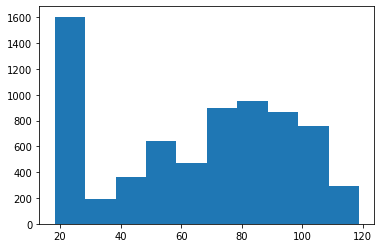

In [6]:
plt.hist(df['MonthlyCharges'])

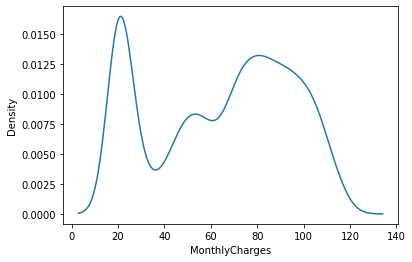

In [10]:
sns.distplot(df['MonthlyCharges'], hist = False)

**Comapre the MonthlyCharges for Churn and Non-Churn customers and check of they show any pattern?**
- Create two sub dataframes, 1. Churn = 'Yes', 2. Churn = 'No'
- Create two distplots. 

In [11]:
ch = df[df['Churn'] == 'Yes']
nch = df[df['Churn'] == 'No']

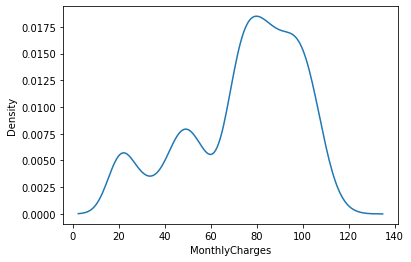

In [12]:
sns.distplot(ch['MonthlyCharges'], hist = False)

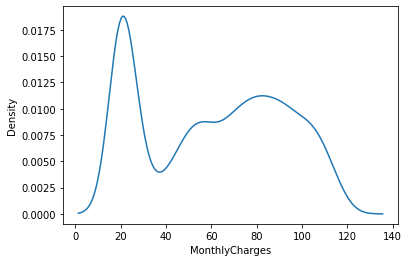

In [13]:
sns.distplot(nch['MonthlyCharges'], hist = False)

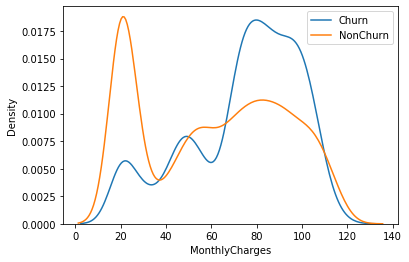

In [17]:
sns.distplot(ch['MonthlyCharges'], hist = False, label = 'Churn')
sns.distplot(nch['MonthlyCharges'], hist = False, label = 'NonChurn')
plt.legend()

**MonthlyCharges**
- Those who are churn, were paying more monthlycharges to the compnay
- Those who are non-churn, are paying less monthlycharges.

### Box Plot

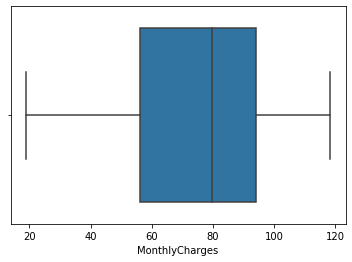

In [18]:
sns.boxplot(ch['MonthlyCharges'])

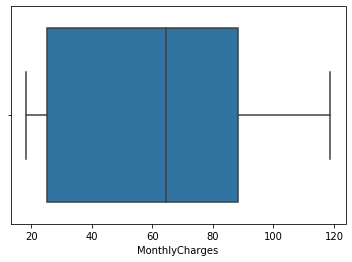

In [19]:
sns.boxplot(nch['MonthlyCharges'])

**Using Box Plot compare the tenure for Churn and Non-Churn customers**

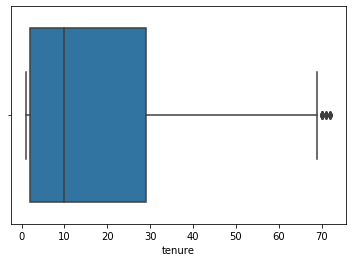

In [20]:
sns.boxplot(ch['tenure'])

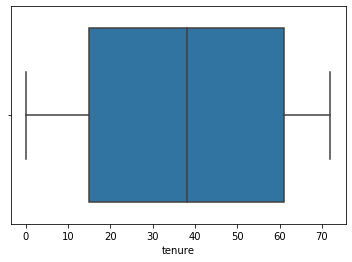

In [21]:
sns.boxplot(nch['tenure'])

**Conclude**

- Churn(NonActive): Were paying more but was with the compnay with very less months
- NonChurn(Acitve): Are paying less but they are with the company for a very long duration.

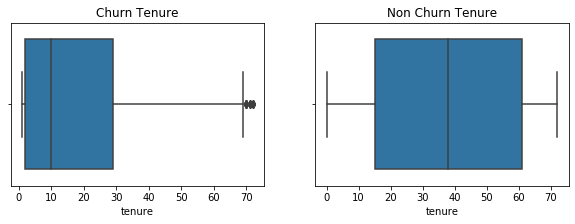

In [25]:
plt.figure(figsize = (10,3))# Widht # Height
plt.subplot(1,2,1)
plt.title("Churn Tenure")
sns.boxplot(ch['tenure'])

plt.subplot(1,2,2)
plt.title("Non Churn Tenure")
sns.boxplot(nch['tenure'])

**One Continuous and One Categorical Data Together**

- X: Categorical
- Y: Continuous

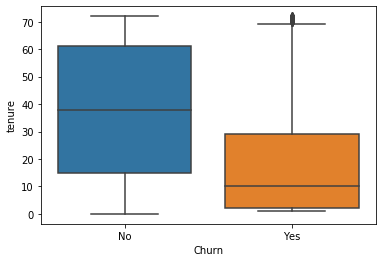

In [26]:
sns.boxplot(x = df['Churn'], y = df['tenure'])

**Compare the totalcharges for various paymentmethod and find out which payment method is generating most of the totalcharges?**

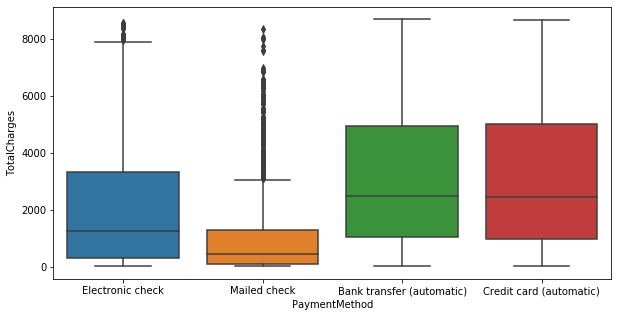

In [28]:
plt.figure(figsize = (10,5))
sns.boxplot(x = df['PaymentMethod'], y = df['TotalCharges'])

**Automatic Payment Method is generating maxium total charges**

## Categorical Data

In [30]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

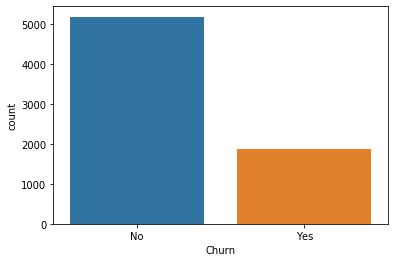

In [31]:
sns.countplot(df['Churn'])

**Plot Two Categorical Columns**

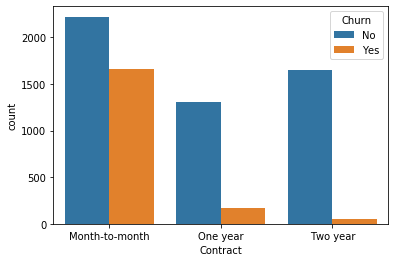

In [32]:
sns.countplot(df['Contract'], hue = df['Churn'])

**Q: The company thinks that fiber optics as the internet service is gaining good total charges. Check the claim.**
- InternetSevice: Cat
- TotalCharges: Conti

**Q: The compnay also thinks that the customers who are using Fiber optics as internet service churns the most. Check the claim.**
- InternetService: cat
- Churn: cat

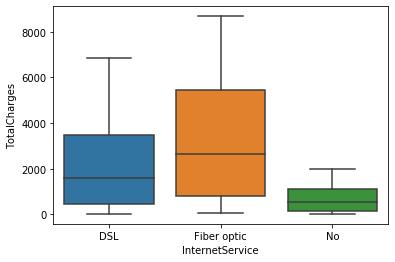

In [33]:
sns.boxplot(x = df['InternetService'], y = df['TotalCharges'])

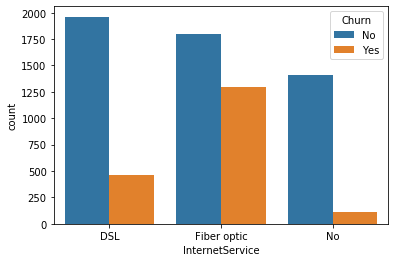

In [34]:
sns.countplot(df['InternetService'], hue = df['Churn'])